In [1]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns

In [2]:
microsoft = pd.read_csv('Microsoft_Stock.csv')
print(microsoft.head())

                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


In [3]:
microsoft.shape

(1511, 6)

In [4]:
microsoft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [5]:
microsoft.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


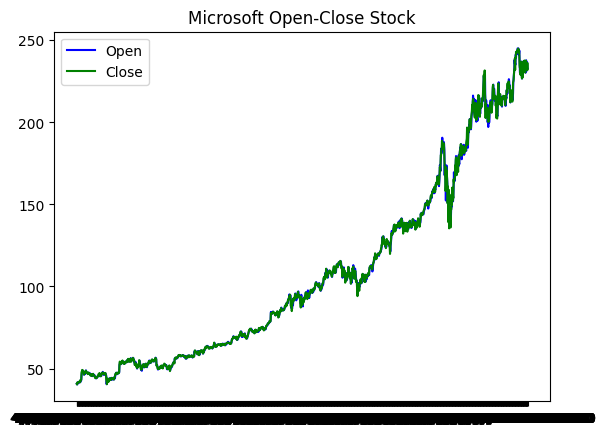

In [8]:
plt.plot(microsoft['Date'],
		microsoft['Open'],
		color="blue",
		label="Open")
plt.plot(microsoft['Date'],
		microsoft['Close'],
		color="green",
		label="Close")
plt.title("Microsoft Open-Close Stock")
plt.legend()

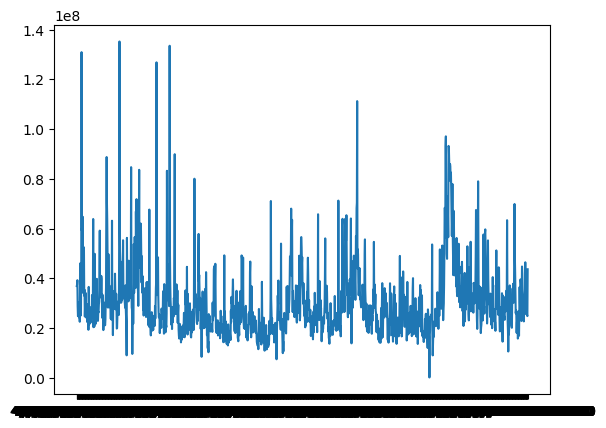

In [9]:
plt.plot(microsoft['Date'],
		microsoft['Volume'])
plt.show()

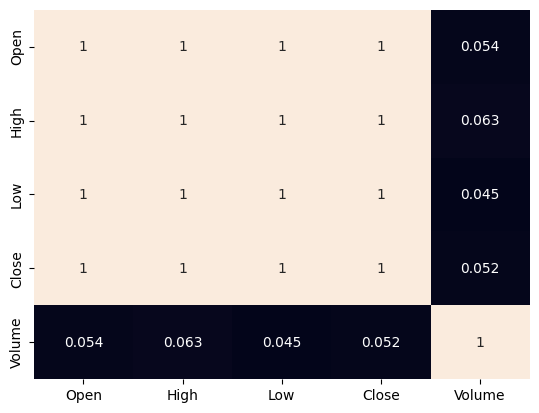

In [12]:
# Convert the 'Date' column to datetime objects
microsoft['Date'] = pd.to_datetime(microsoft['Date'])

# Extract numerical features for correlation analysis
numerical_features = microsoft.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cbar=False)
plt.show()

Text(0.5, 1.0, 'Microsoft Stock Prices')

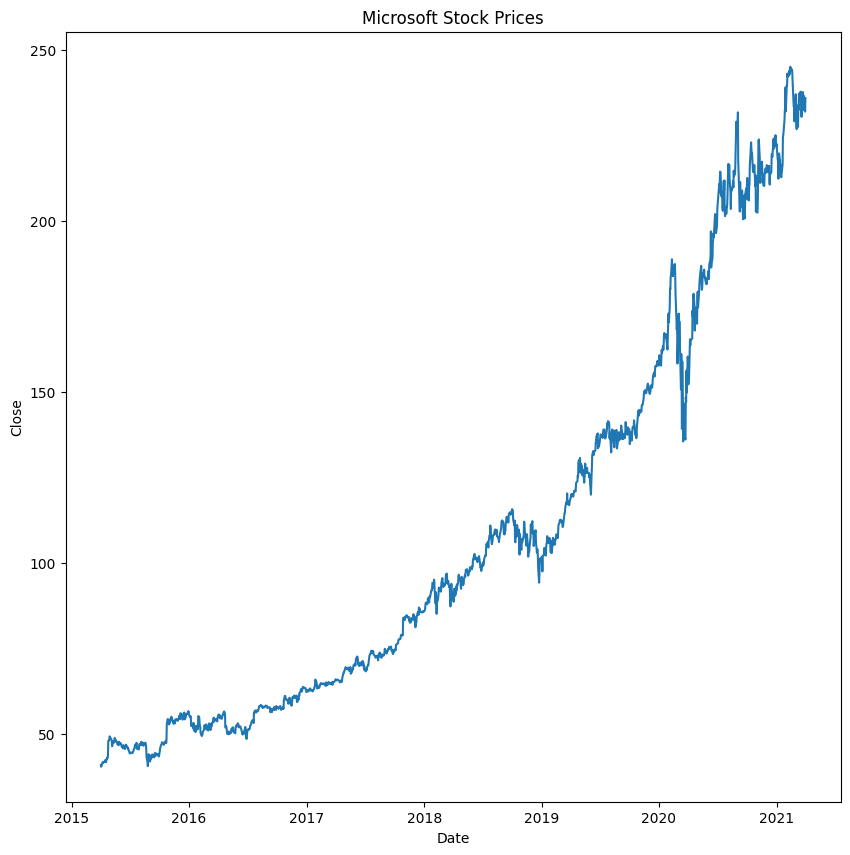

In [14]:
microsoft['Date'] = pd.to_datetime(microsoft['Date'])
prediction = microsoft.loc[(microsoft['Date']
							> datetime(2013, 1, 1))
							& (microsoft['Date']
							< datetime(2018, 1, 1))]

plt.figure(figsize=(10, 10))
plt.plot(microsoft['Date'], microsoft['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Microsoft Stock Prices")

In [19]:
# prepare the training set samples
msft_close = microsoft.filter(['Close']) # Close column name should be capitalized
dataset = msft_close.values
training = int(np.ceil(len(dataset) * 0.95))
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]
x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) # removed extra indent
X_train = np.reshape(x_train,
					(x_train.shape[0],
					x_train.shape[1], 1))

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape
                            =(X_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam',
              loss='mae',
              metrics=[RootMeanSquaredError()]) # Changed this line

history = model.fit(X_train, y_train,
                    epochs=20)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.3209 - root_mean_squared_error: 0.4804
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0982 - root_mean_squared_error: 0.1427
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0823 - root_mean_squared_error: 0.1193
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0831 - root_mean_squared_error: 0.1186
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0749 - root_mean_squared_error: 0.1080
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0758 - root_mean_squared_error: 0.1088
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0769 - root_mean_squared_error: 0.1113
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 0.0736 - root_mean_squared_error: 0.1085
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0703 - root_mean_squared_error: 0.1000
Epoch 10/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0730 - root_mean_squared_error: 0.1021

In [23]:
testing = ss[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(testing)):
    x_test.append(testing[i-60:i, 0])

x_test = np.array(x_test)
X_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1], 1))

pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step


<ipython-input-25-527f6b337b93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = pred


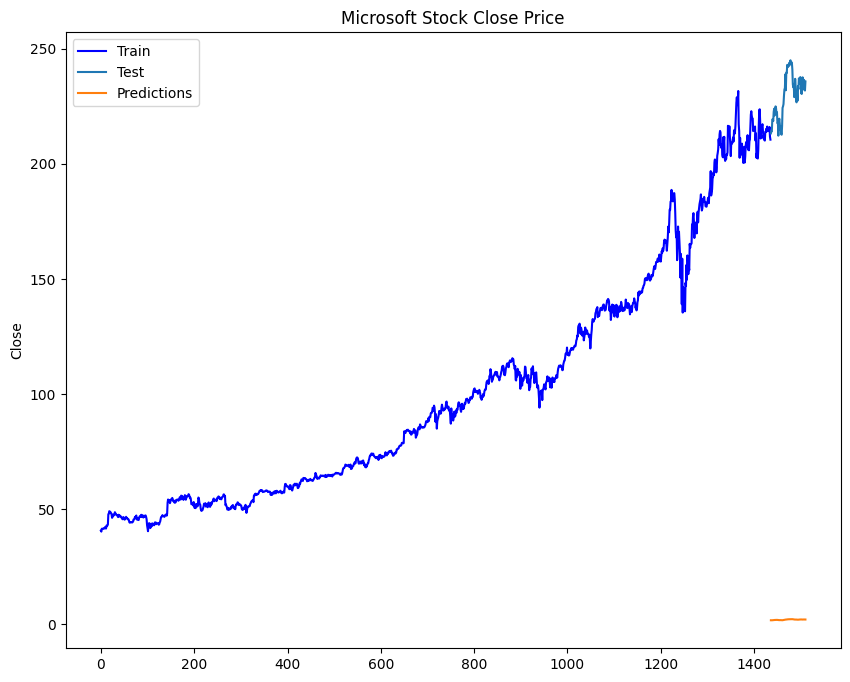

In [25]:
train = microsoft[:training]
test = microsoft[training:]
test['Predictions'] = pred

plt.figure(figsize=(10, 8))
plt.plot(train['Close'], c="b")
plt.plot(test[['Close', 'Predictions']])
plt.title('Microsoft Stock Close Price')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])